## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)


---

This is a project on classifying the emtion of the tweets using tensorflow. Multi-classification model to predict the sentiment of the tweets with 4 layers such as bidirectional LSTM, Dense layer.

## Task 1: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

In [53]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


# This function, graphs the model on how the accuracy and loss changes over the Epochs.
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.10.0


## Task 2: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
dataset = nlp.load_dataset('emotion')

Using custom data configuration default


In [4]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [5]:
train = dataset['train']
test = dataset['test']
val = dataset['validation']

In [6]:
def get_tweet(data):

    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]

    return tweets, labels

In [7]:
tweets, labels = get_tweet(train)

In [8]:
tweets[0],labels[0]

('i didnt feel humiliated', 'sadness')

## Task 3: Tokenizer

1. Tokenizing the tweets

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer(num_words=10000,oov_token='<UNK')  # Out of vocab OOV
tokenizer.fit_on_texts(tweets)

In [11]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [12]:
tweets[0]

'i didnt feel humiliated'

## Task 4: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

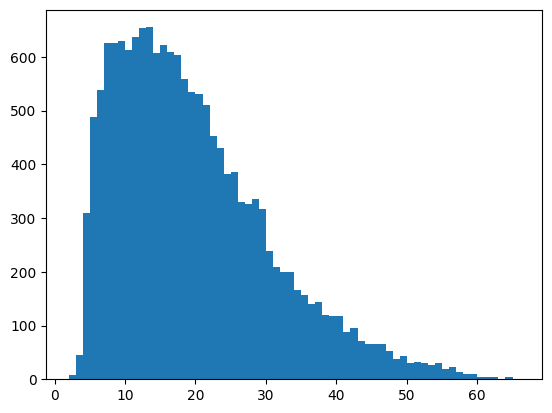

In [13]:
lengths  = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [14]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
def get_sequences(tokenizer, tweets):
    
    sequences = tokenizer.texts_to_sequences(tweets)
    padded = pad_sequences(sequences=sequences, truncating='post',padding='post', maxlen=maxlen)

    return padded


In [16]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [17]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 5: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [18]:
classes = set(labels)
print(classes)

{'love', 'fear', 'anger', 'sadness', 'surprise', 'joy'}


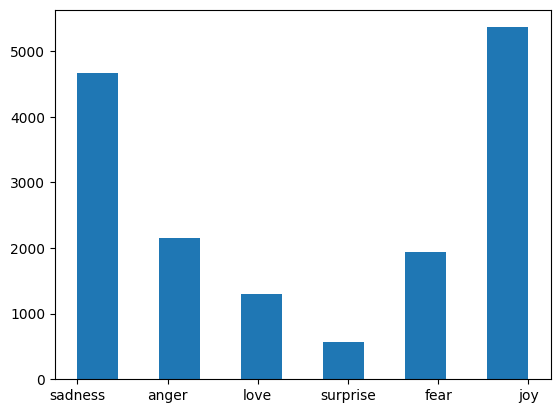

In [19]:
plt.hist(labels, bins=(len(set(labels))*2 -1))
plt.show()

In [20]:
classes_to_index = dict((c,i) for i,c in enumerate(classes))

index_to_class = dict((v,k) for k,v in classes_to_index.items())

In [21]:
classes_to_index

{'love': 0, 'fear': 1, 'anger': 2, 'sadness': 3, 'surprise': 4, 'joy': 5}

In [22]:
index_to_class

{0: 'love', 1: 'fear', 2: 'anger', 3: 'sadness', 4: 'surprise', 5: 'joy'}

In [23]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [24]:
train_labels = names_to_ids(labels)
print(train_labels[0])

3


## Task 6: Creating the Model

1. Creating the model
2. Compiling the model

In [26]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000,16,input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss ='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics =['accuracy']
)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 7: Training the Model

1. Preparing a validation set
2. Training the model

In [30]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer,val_tweets)
val_labels = names_to_ids(val_labels)

In [31]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 3)

In [32]:
train_model1 = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20


2022-11-22 11:40:49.533121: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-22 11:40:50.624232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:40:51.128123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:40:51.159202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:40:52.178798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:40:52.191426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:40:52.618840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114

500/500 [==============================] - ETA: 0s - loss: 1.3425 - accuracy: 0.4629

2022-11-22 11:41:24.001568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:41:24.118825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:41:24.128153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:41:24.256015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 11:41:24.266205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 37s 65ms/step - loss: 1.3425 - accuracy: 0.4629 - val_loss: 0.9348 - val_accuracy: 0.6685
Epoch 2/20
500/500 [==============================] - 30s 61ms/step - loss: 0.6850 - accuracy: 0.7193 - val_loss: 0.6270 - val_accuracy: 0.7615
Epoch 3/20
500/500 [==============================] - 30s 61ms/step - loss: 0.4771 - accuracy: 0.8116 - val_loss: 0.5947 - val_accuracy: 0.7960
Epoch 4/20
500/500 [==============================] - 30s 60ms/step - loss: 0.3745 - accuracy: 0.8713 - val_loss: 0.4847 - val_accuracy: 0.8470
Epoch 5/20
500/500 [==============================] - 30s 60ms/step - loss: 0.2579 - accuracy: 0.9191 - val_loss: 0.4384 - val_accuracy: 0.8710
Epoch 6/20
500/500 [==============================] - 30s 61ms/step - loss: 0.2006 - accuracy: 0.9396 - val_loss: 0.4248 - val_accuracy: 0.8740
Epoch 7/20
500/500 [==============================] - 30s 60ms/step - loss: 0.1521 - accuracy: 0.9543 - val_loss: 0.4251 - val_accuracy: 0.8770
Epo

## Task 8: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

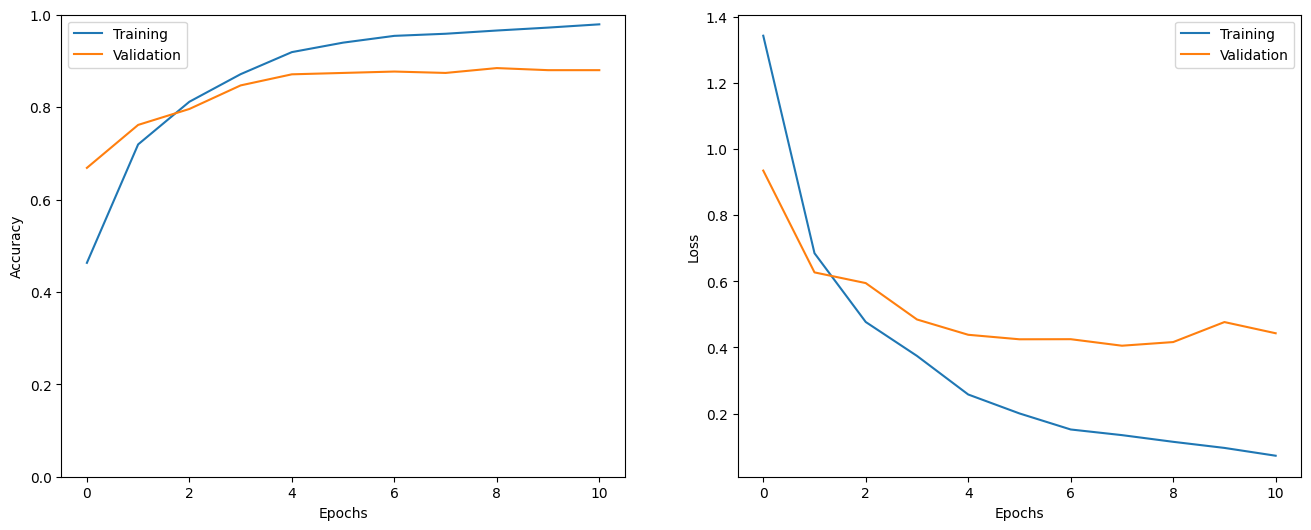

In [33]:
show_history(train_model1)

In [34]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [36]:
model.evaluate(test_seq, test_labels)

63/63 [==============================] - 2s 31ms/step - loss: 0.4346 - accuracy: 0.8780


[0.4345848262310028, 0.878000020980835]

In [40]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:',test_tweets[i])
print('Emotion:',index_to_class[test_labels[i]])

predict = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(predict).astype('uint8')]

print('Predicted Emotion:', pred_class)

Sentence: i feel shocked that you d stoup to destinys child b
Emotion: surprise
1/1 [==============================] - 0s 56ms/step
Predicted Emotion: surprise


In [60]:
preds = np.argmax(model.predict(test_seq), axis=-1)

63/63 [==============================] - 2s 28ms/step


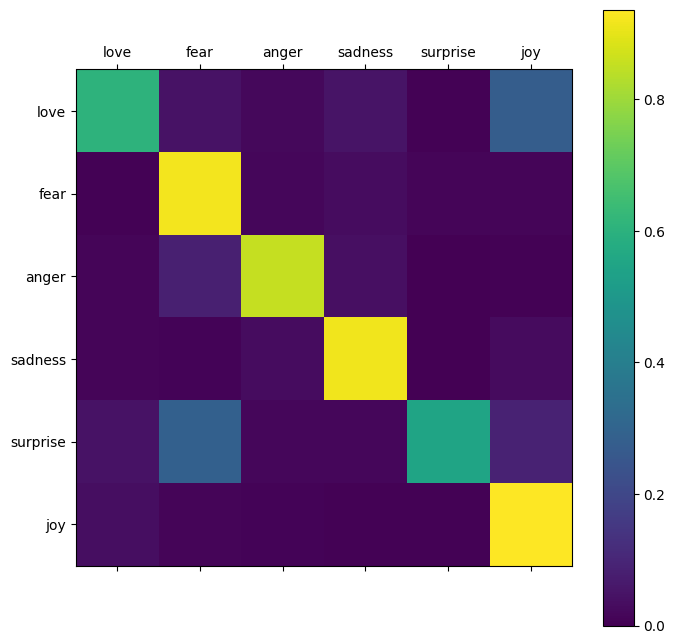

In [61]:
show_confusion_matrix(test_labels,preds, list(classes))